In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Load dataset
file_path = r"C:\Users\aayus\.conda\envs\datascience\movie\IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
# Step 2: Data Preprocessing
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Ro

In [4]:
# Check if necessary columns are available
expected_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']
for col in expected_columns:
    if col not in df.columns:
        print(f"Column '{col}' is missing in the dataset.")
        exit()

In [5]:
# Step 3: Data Cleaning & Handling Missing Values
df = df.dropna(subset=expected_columns)

In [6]:
# Convert 'Year' to numeric and handle errors
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [7]:
# Extract numeric values from 'Duration' (e.g., convert "109 min" to 109)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aayus\AppData\Local\Temp\ipykernel_11340\1983509703.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)


In [8]:
# Convert 'Votes' to numeric (some rows might contain commas or non-numeric symbols)
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

In [9]:
# Step 4: Encoding categorical features
label_enc_director = LabelEncoder()
label_enc_actor1 = LabelEncoder()
label_enc_actor2 = LabelEncoder()
label_enc_actor3 = LabelEncoder()

df['director_encoded'] = label_enc_director.fit_transform(df['Director'])
df['actor1_encoded'] = label_enc_actor1.fit_transform(df['Actor 1'])
df['actor2_encoded'] = label_enc_actor2.fit_transform(df['Actor 2'])
df['actor3_encoded'] = label_enc_actor3.fit_transform(df['Actor 3'])

In [10]:
# One-hot encoding for 'Genre' (since Genre can have multiple categories)
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [11]:
# Step 5: Feature Selection
X = df.drop(columns=['Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Name'])
y = df['Rating']

In [12]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 7: Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Step 8: Prediction
y_pred = model.predict(X_test)

In [15]:
# Step 9: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5372728875661374
R-squared: 0.17031419128635117


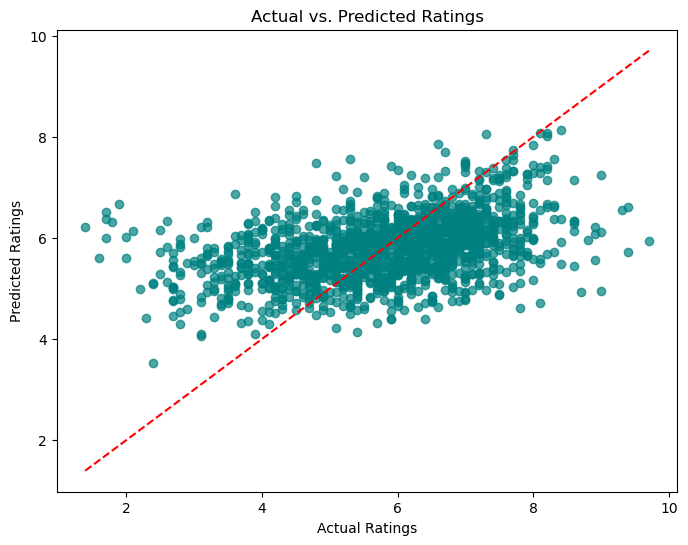

In [16]:
# Visualization 1: Actual vs Predicted Ratings Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.show()

In [19]:
# Ensure the sample has all columns in X, with missing ones initialized to 0
sample_movie = pd.DataFrame([{
    'Year': 2020,
    'Duration': 120,
    'Votes': 5000,
    'director_encoded': label_enc_director.transform(['Director Name'])[0] if 'Director Name' in label_enc_director.classes_ else 0,
    'actor1_encoded': label_enc_actor1.transform(['Actor 1 Name'])[0] if 'Actor 1 Name' in label_enc_actor1.classes_ else 0,
    'actor2_encoded': label_enc_actor2.transform(['Actor 2 Name'])[0] if 'Actor 2 Name' in label_enc_actor2.classes_ else 0,
    'actor3_encoded': label_enc_actor3.transform(['Actor 3 Name'])[0] if 'Actor 3 Name' in label_enc_actor3.classes_ else 0,
    # Additional hardcoded values for sample
}], columns=X.columns).fillna(0)

In [20]:
# Ensure the sample has all the columns the model was trained with
for col in X.columns:
    if col not in sample_movie.columns:
        sample_movie[col] = 0

In [21]:
# Predict the rating for the sample movie
sample_prediction = model.predict(sample_movie)
print(f"Predicted Rating for Sample Movie: {sample_prediction[0]:.2f}")

Predicted Rating for Sample Movie: 5.74
